<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: Mariya Mansurova, Analyst & developer in Yandex.Metrics team. Translated by Ivan Zakharov, ML enthusiast. <br>This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #9 (demo)
## <center> Time series analysis

**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis) + [solution](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis-solution).**

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [2]:
!pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB 487.6 kB/s eta 0:00:39
   ---------------------------------------- 0.2/19.1 MB 1.3 MB/s eta 0:00:15
   - -------------------------------------- 0.5/19.1 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/19.1 MB 6.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.9/19.1 MB 11.0 MB/s eta 0:00:02
   ----------- ---------------------------- 5.5/19.1 MB 17.4 MB/s eta 0:00:01
   ----------------- ---------------------- 8.5/19.1 MB 23.5 MB/s eta 0:00:01
   ----------------------- ---------------- 11.4/19.1 MB 50.4 MB/s eta 0:00:01
   ------------------------------ --------- 14.3/19.1 MB 65.6 MB/s eta 0:00:01
   ------------------------------------ --- 17.4/19.1 MB 65.6 MB/s eta 0:00:01
   ------

In [1]:
import os
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

print(__version__)  # need 1.9.0 or greater
init_notebook_mode(connected=True)


def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

5.24.1


## Data preparation

In [2]:
df = pd.read_csv(r"C:\Users\alican.can\Desktop\mlcourse.ai-main\data\wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
df.shape

(383, 7)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [4]:
df.date = pd.to_datetime(df.date)

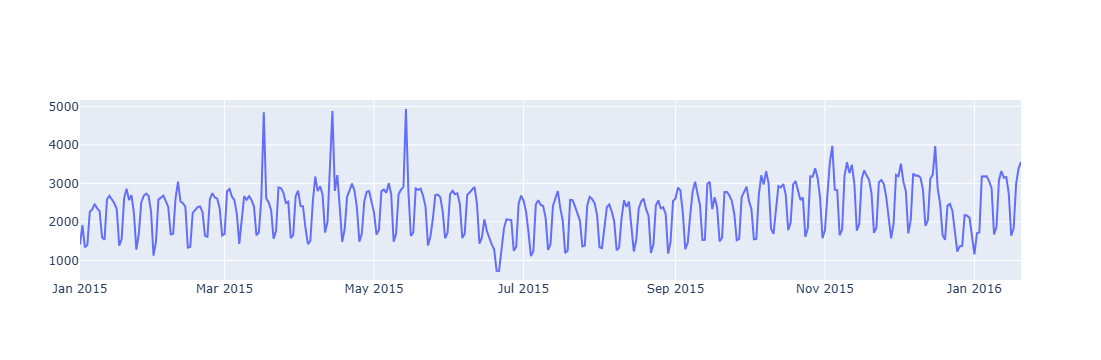

In [5]:
plotly_df(df.set_index("date")[["count"]])

In [6]:
import sys
print(sys.version)


3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]


In [7]:
from prophet import Prophet

In [8]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


In [9]:
train_df = df[:-predictions].copy()
m = Prophet()
m.fit(train_df)

10:50:56 - cmdstanpy - INFO - Chain [1] start processing
10:50:56 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=predictions)
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [11]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2975.100998,1704.869763,2521.370392,2955.432530,2997.431961,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,0.0,0.0,0.0,2112.555034
379,2016-01-17,2980.432400,1841.359001,2687.391048,2959.317661,3004.500734,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,0.0,0.0,0.0,2258.906661
380,2016-01-18,2985.763803,2840.463555,3677.518820,2963.419386,3011.293810,281.375854,281.375854,281.375854,281.375854,281.375854,281.375854,0.0,0.0,0.0,3267.139657
381,2016-01-19,2991.095205,3124.554390,3951.646450,2967.189972,3018.171090,542.213022,542.213022,542.213022,542.213022,542.213022,542.213022,0.0,0.0,0.0,3533.308227
382,2016-01-20,2996.426608,3015.159331,3845.142165,2971.232393,3025.254888,426.073193,426.073193,426.073193,426.073193,426.073193,426.073193,0.0,0.0,0.0,3422.499801


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- 3426
- 5229
- 2744

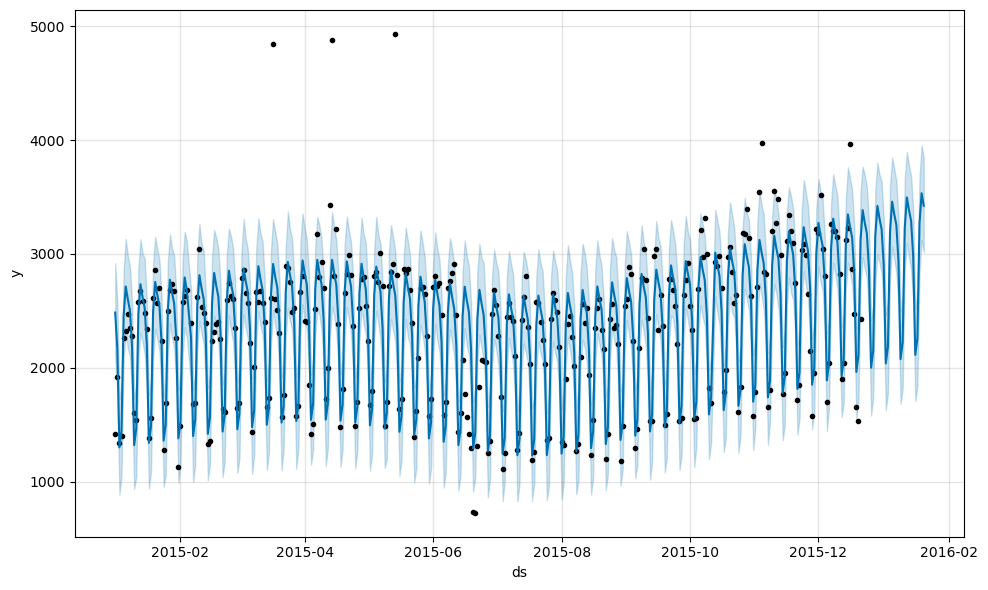

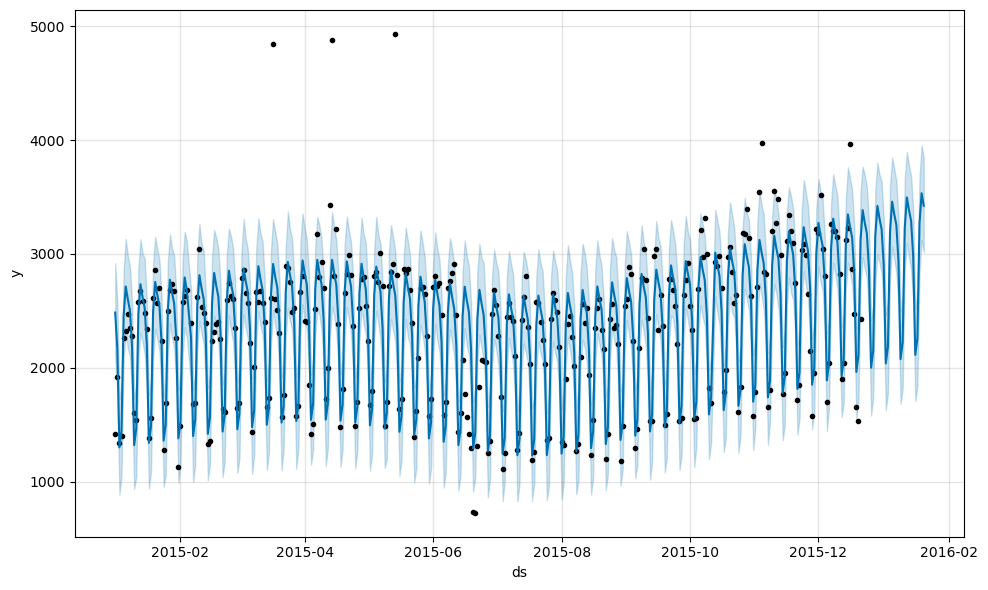

In [12]:
# You code here
m.plot(forecast)

Estimate the quality of the prediction with the last 30 points.

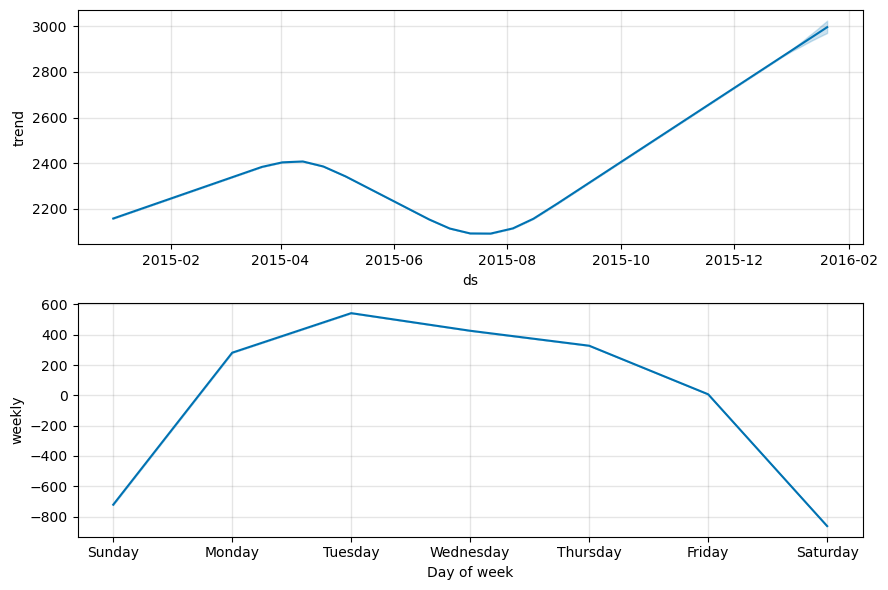

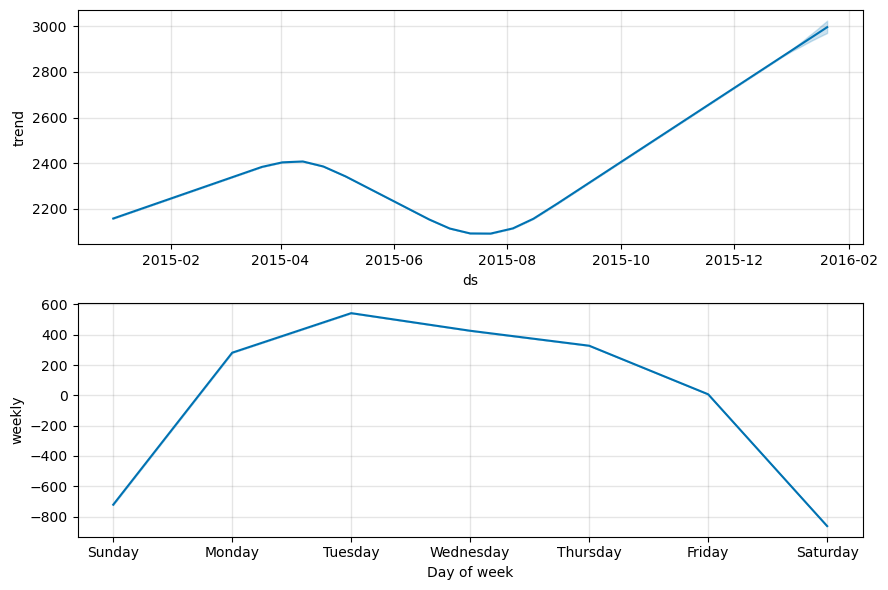

In [13]:
# You code here
m.plot_components(forecast)

In [14]:
cmp_df = forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(
    df.set_index("ds")
)

In [15]:
cmp_df["e"] = cmp_df["y"] - cmp_df["yhat"]
cmp_df["p"] = 100 * cmp_df["e"] / cmp_df["y"]
print("MAPE = ", round(np.mean(abs(cmp_df[-predictions:]["p"])), 2))
print("MAE = ", round(np.mean(abs(cmp_df[-predictions:]["e"])), 2))

MAPE =  34.35
MAE =  596.73


**<font color='red'>Question 2:</font> What is MAPE equal to?**

- 34.5
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- 600
- 903

## Predicting with ARIMA

In [24]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 325.1 kB/s eta 0:00:31
   ---------------------------------------- 0.1/9.9 MB 655.4 kB/s eta 0:00:15
   - -------------------------------------- 0.3/9.9 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.9 MB 3.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/9.9 MB 7.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.5/9.9 MB 12.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.3/9.9 MB 16.9 MB/s eta 0:00:01
   --------------------- ------------------ 5.4/9.9 MB 15.0 MB/s eta 0:00:01
   --------------------- ------------------ 5.4/9.9 MB 15.0 MB/s eta 0:00:01
   ----------------------- ---------------- 5.7/9.9 MB 13.1 MB/s eta 0:00:01
   -------------------------- ------------- 6.5/9.9 MB 13.9 MB/s eta 0:00:01
   -------------

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- Series is not stationary, p_value = 0.107
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

Dickey-Fuller test: p=0.107392


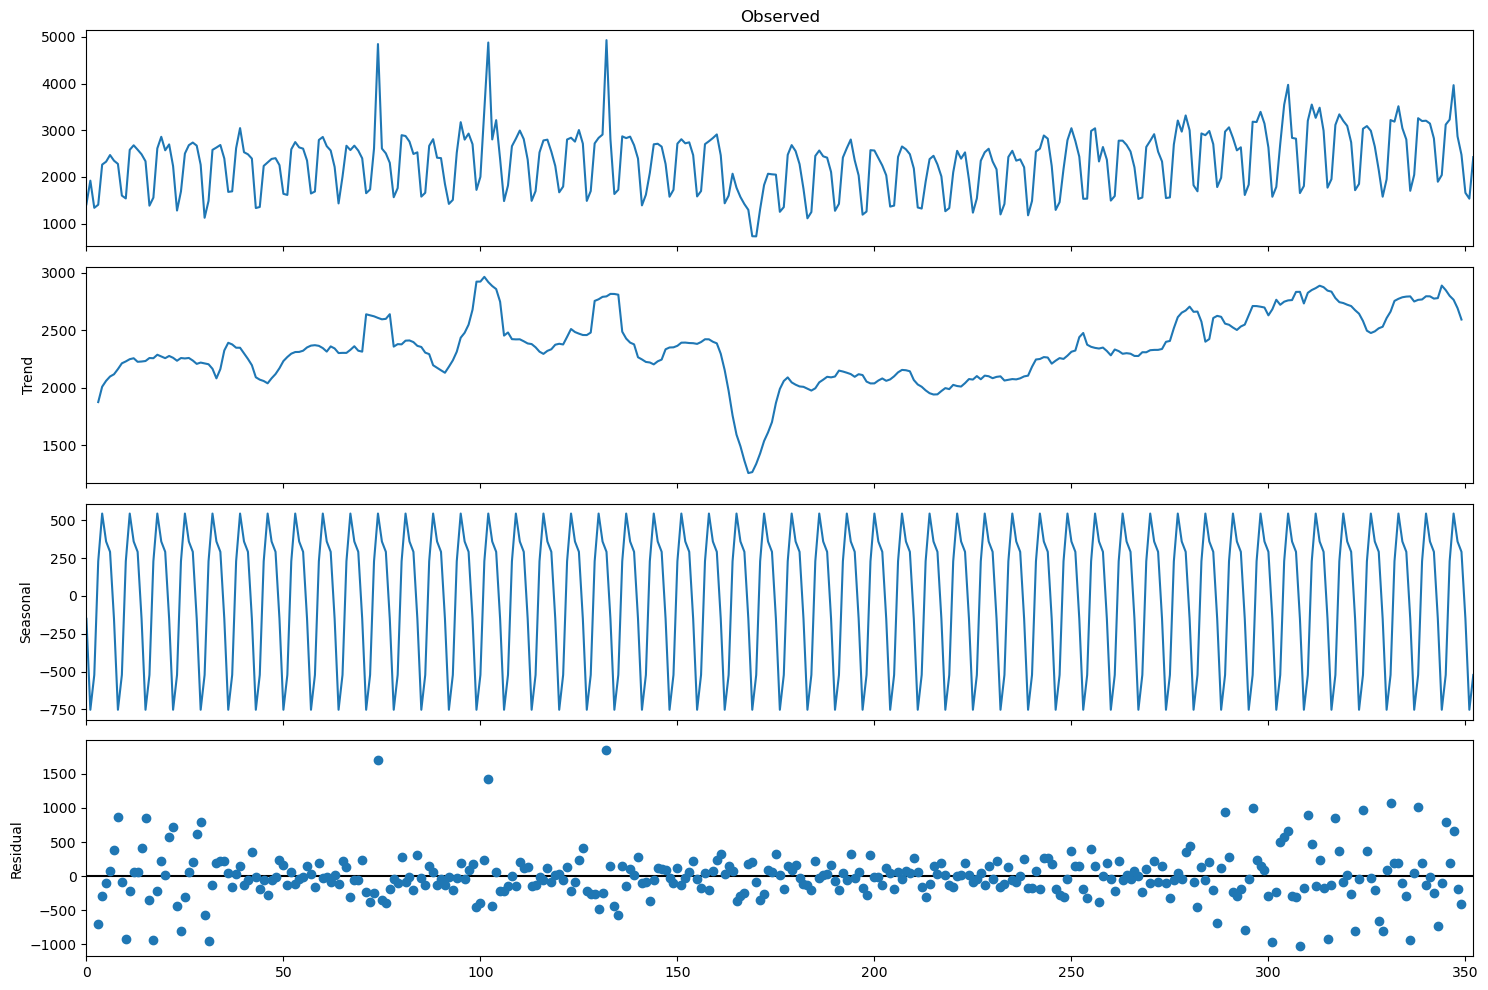

In [17]:
# You code here
sm.tsa.seasonal_decompose(train_df["y"].values, period=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df["y"])[1])

Dickey-Fuller test: p=0.000000


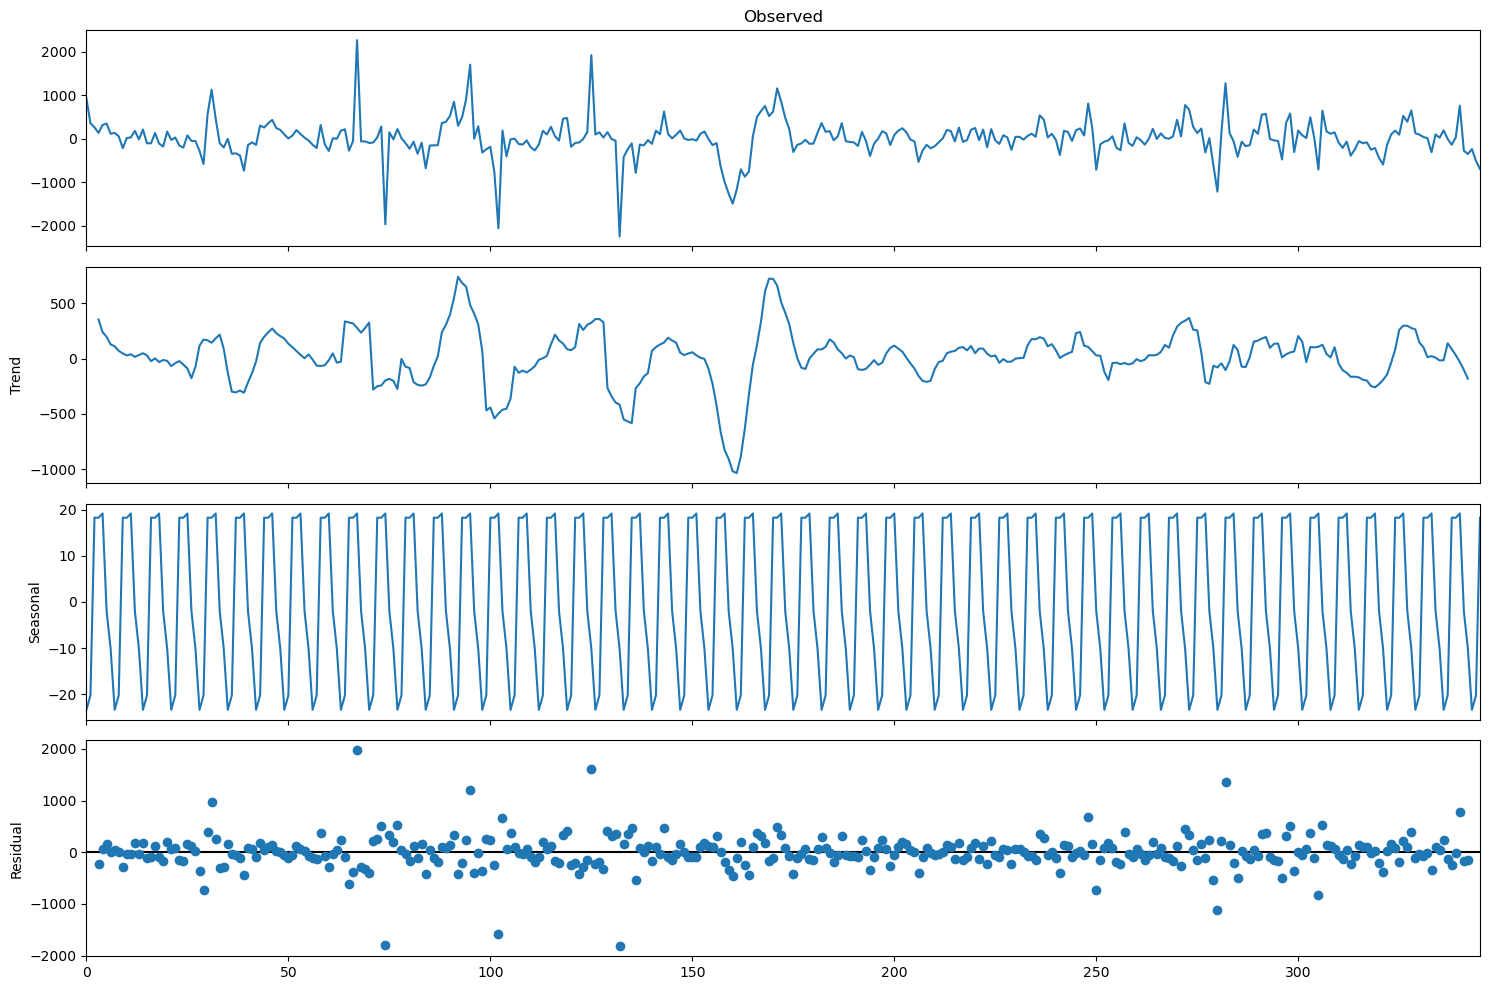

In [18]:
train_df.set_index("ds", inplace=True)
train_df["y_diff"] = train_df.y - train_df.y.shift(7)
sm.tsa.seasonal_decompose(train_df.y_diff[7:].values, period=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df.y_diff[8:])[1])

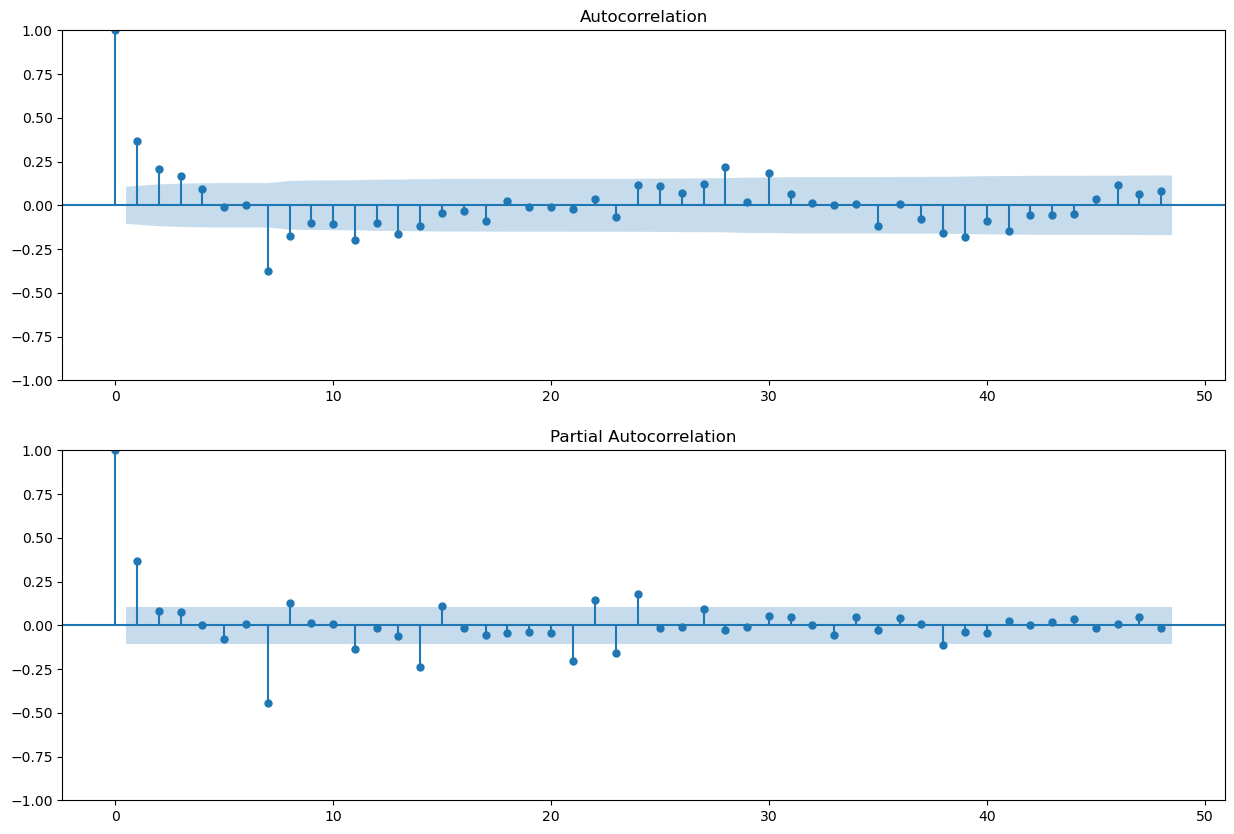

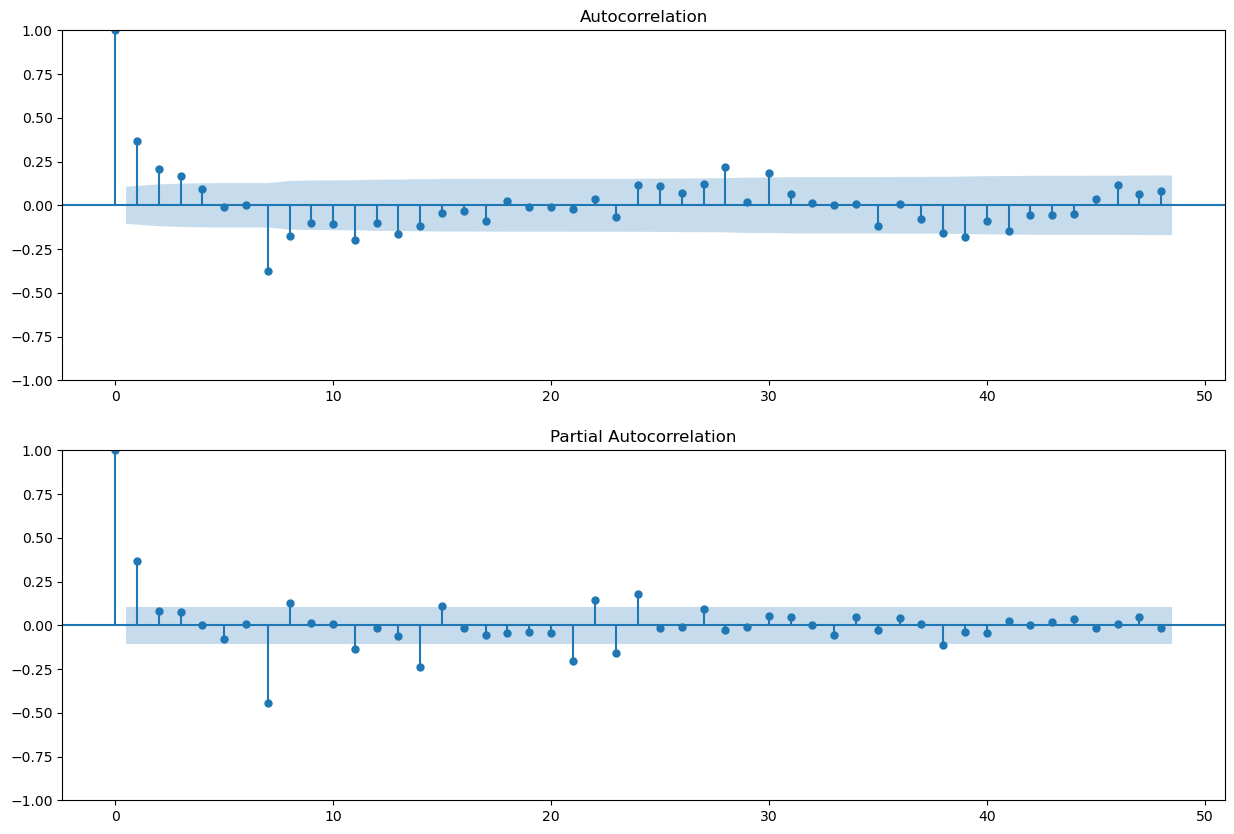

In [19]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

In [20]:
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)

In [21]:
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

384

In [22]:
%%time
import warnings

from tqdm.notebook import tqdm

results1 = []
best_aic = float("inf")
warnings.filterwarnings("ignore")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            train_df["y"],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], 7),
        ).fit(disp=-1)

    except (ValueError, np.linalg.LinAlgError):
        continue

    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results1.append([param, model.aic])

  0%|          | 0/384 [00:00<?, ?it/s]

CPU times: total: 6min 10s
Wall time: 6min 56s


In [23]:
result_table1 = pd.DataFrame(results1)
result_table1.columns = ["parameters", "aic"]
print(result_table1.sort_values(by="aic", ascending=True).head())

             parameters          aic
239  (1, 0, 1, 3, 2, 1)    14.000000
263  (1, 0, 2, 3, 2, 1)    16.000000
347  (1, 1, 2, 1, 2, 1)  2972.967361
167  (0, 1, 2, 3, 2, 1)  4961.632628
335  (1, 1, 1, 3, 2, 1)  4962.832568


In [24]:
result_table1[
    result_table1["parameters"].isin(
        [(1, 0, 2, 3, 1, 0), (1, 1, 2, 3, 2, 1), (1, 1, 2, 3, 1, 1), (1, 0, 2, 3, 0, 0)]
    )
].sort_values(by="aic")

,parameters,aic
359,"(1, 1, 2, 3, 2, 1)",4988.962764
357,"(1, 1, 2, 3, 1, 1)",5019.555903
260,"(1, 0, 2, 3, 1, 0)",5022.312524
258,"(1, 0, 2, 3, 0, 0)",5183.747134


In [25]:
import scipy.stats

train_df["y_box"], lmbda = scipy.stats.boxcox(train_df["y"])
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.732841


In [26]:
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            train_df["y_box"],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], 7),
            enforce_stationary=False,  
            enforce_invertibility=False  
        ).fit(disp=-1)

    except (ValueError, np.linalg.LinAlgError):
        continue

    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])

warnings.filterwarnings("default")

  0%|          | 0/384 [00:00<?, ?it/s]

In [27]:
result_table2 = pd.DataFrame(results2)
result_table2.columns = ["parameters", "aic"]
print(result_table2.sort_values(by="aic", ascending=True).head())

             parameters          aic
262  (1, 0, 2, 3, 2, 1)  3528.515466
286  (1, 0, 3, 3, 2, 1)  3529.820983
214  (1, 0, 0, 3, 2, 1)  3530.232187
238  (1, 0, 1, 3, 2, 1)  3531.846612
382  (1, 1, 3, 3, 2, 1)  3533.418892


In [28]:
result_table2[
    result_table2["parameters"].isin(
        [(1, 0, 2, 3, 1, 0), (1, 1, 2, 3, 2, 1), (1, 1, 2, 3, 1, 1), (1, 0, 2, 3, 0, 0)]
    )
].sort_values(by="aic")

,parameters,aic
358,"(1, 1, 2, 3, 2, 1)",3556.461667
259,"(1, 0, 2, 3, 1, 0)",3556.880696
356,"(1, 1, 2, 3, 1, 1)",3557.843689
257,"(1, 0, 2, 3, 0, 0)",3674.915024


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

In [29]:
best_model = sm.tsa.statespace.SARIMAX(
    train_df["y_box"],
    order=(1, 0, 2),
    seasonal_order=(3, 2, 1, 7),
    enforce_stationary=False,  
    enforce_invertibility=False  
).fit(disp=-1)

C:\Users\alican.can\.conda\envs\pandas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\alican.can\.conda\envs\pandas\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

C:\Users\alican.can\.conda\envs\pandas\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [30]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               y_box   No. Observations:                  353
Model:             SARIMAX(1, 0, 2)x(3, 2, [1], 7)   Log Likelihood               -1756.258
Date:                             Tue, 28 Jan 2025   AIC                           3528.515
Time:                                     11:10:26   BIC                           3559.123
Sample:                                          0   HQIC                          3540.713
                                             - 353                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8367      0.110      7.633      0.000       0.622       1.052
ma.L1         -0.3502      

Student's test: p=0.120374
Dickey-Fuller test: p=0.000000


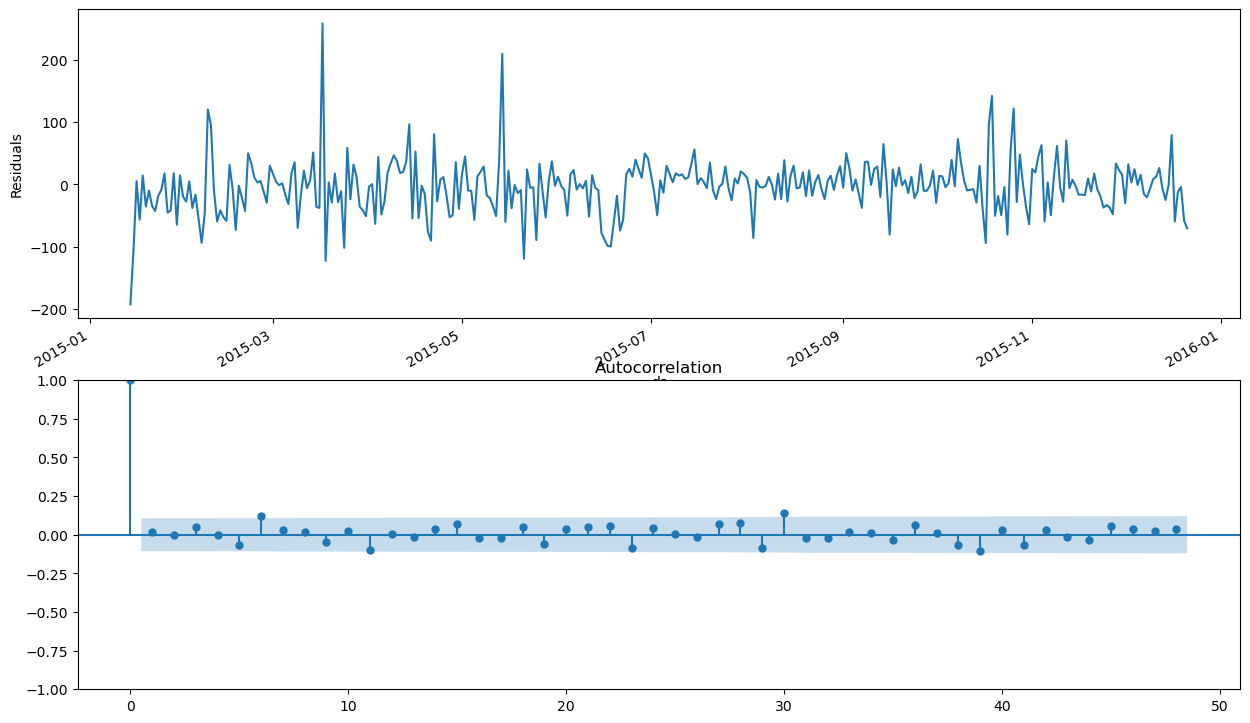

In [31]:
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u"Residuals")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student's test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [32]:
def invboxcox(y, lmbda):
    if lmbda == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lmbda * y + 1) / lmbda)

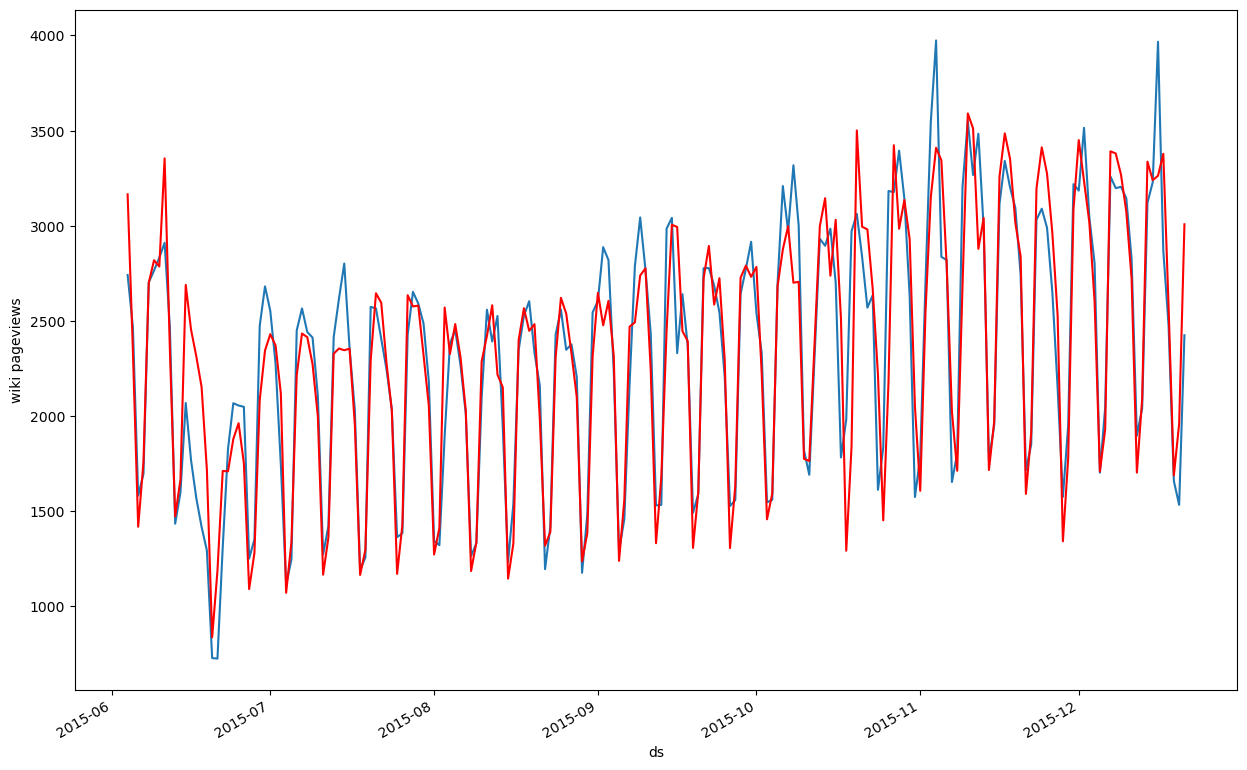

In [33]:
train_df["arima_model"] = invboxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color="r")
plt.ylabel("wiki pageviews");